/var/folders/2y/t2fct91n6c515y6sv4v690lc0000gn/T/ipykernel_92311/2927597290.py:47: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


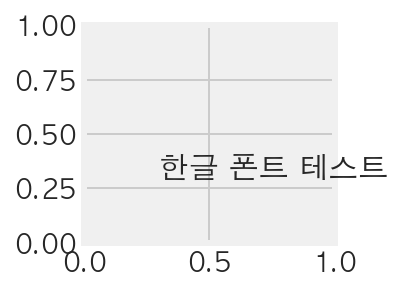

In [1]:
# Data processing
# ==============================================================================
import os 
import datatable


import pandas as pd
import numpy as np
import openpyxl
import math
import datetime as dt

# Plots
# ==============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid',font_scale=1.2) 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

## * 이 셀이 제대로 작동하지 않고 길게 warning 메시지가 나올 경우, 상단의 메뉴에서 <런타임>-<런타임 다시 시작>을 클릭한 뒤 처음부터 코드를 실행하세요 
# 그래프 한글 폰트 설정

import matplotlib 
import platform 
from matplotlib import font_manager, rc 
%config InlineBackend.figure_format = 'retina'

# '-' 부호가 제대로 표시되게 하는 설정 
matplotlib.rcParams['axes.unicode_minus'] = False
# 운영 체제마다 한글이 보이게 하는 설정 
if platform.system() == 'Windows': # 윈도우
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
elif platform.system() == 'Darwin': #맥
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux': # 리눅스
    rc('font', family='NanumBarunGothic')

#폰트 선명하게 보이게 하기 위해
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Test
plt.figure(figsize=(2,2))
plt.text(0.3, 0.3, '한글 폰트 테스트', size=15)
plt.show() 

# Configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

In [2]:
loan = pd.read_csv('/Users/baeknarim/데이터분석분야_퓨처스부문_포포나무팀/추가제출파일/DATA/RAWDATA/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908/loan_result.csv')
user = pd.read_csv('/Users/baeknarim/데이터분석분야_퓨처스부문_포포나무팀/추가제출파일/DATA/RAWDATA/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908/user_spec.csv')

In [3]:
loan2 =loan.copy()
user2 = user.copy()

In [4]:
user2.isna().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [5]:
user2 = user2.sort_values(['user_id','insert_time'])

# loan_rate, loan_limit이 NA인 행 제거

In [6]:
loan2.isna().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
dtype: int64

In [7]:
loan2.shape

(13527363, 7)

In [8]:
loan2.loc[loan2['loan_limit'].isna()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
461,1029177,2022-06-07 15:29:06,51,21,NaN,NaN,NaN
4318,1086409,2022-06-07 18:11:31,13,262,NaN,NaN,NaN
6971,1193826,2022-06-07 17:13:03,1,202,NaN,NaN,NaN
8459,447492,2022-06-07 17:12:08,30,232,NaN,NaN,NaN
9220,260060,2022-06-07 11:45:43,30,85,NaN,NaN,NaN
...,...,...,...,...,...,...,...
13521728,1222550,2022-06-03 16:51:24,13,262,NaN,NaN,NaN
13522701,135727,2022-06-03 10:59:08,10,149,NaN,NaN,NaN
13523316,687402,2022-06-03 12:12:31,1,102,NaN,NaN,NaN
13523827,621491,2022-06-03 17:05:01,51,21,NaN,NaN,NaN


In [9]:
loan2 = loan2.dropna(subset=['loan_limit'])

In [10]:
loan2.isna().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                     0
loan_rate                      0
is_applied               3255482
dtype: int64

# loan_result와 user_spec을 각각 train/test로 나누기

In [11]:
loan2['loanapply_insert_time'] = pd.to_datetime(loan2['loanapply_insert_time'])
user2['insert_time'] = pd.to_datetime(user2['insert_time'] )

In [12]:
loan_train = loan2.loc[loan2['loanapply_insert_time']<'2022-06-01'].sort_values('loanapply_insert_time')

In [13]:
user_train = user2.loc[user2['insert_time']<'2022-06-01'].sort_values('insert_time')

In [14]:
loan_test = loan2.loc[loan2['loanapply_insert_time']>='2022-06-01'].sort_values('loanapply_insert_time')

In [15]:
user_test = user2.loc[user2['insert_time']>='2022-06-01'].sort_values('insert_time')

In [16]:
print(loan_train.shape, loan_test.shape, user_train.shape, user_test.shape)

(10264386, 7) (3255482, 7) (1029390, 17) (364826, 17)


In [17]:
1029390+364826

1394216

# train 내에서 bfill&ffill

train

In [18]:
user_train.isna().sum()

application_id                              0
user_id                                     0
birth_year                               8603
gender                                   8603
insert_time                                 0
credit_score                            85638
yearly_income                              23
income_type                                23
company_enter_month                    123040
employment_type                            23
houseown_type                              23
desired_amount                             23
purpose                                    23
personal_rehabilitation_yn             585382
personal_rehabilitation_complete_yn    922059
existing_loan_cnt                      155986
existing_loan_amt                      239909
dtype: int64

In [19]:
user_train['birth_year'] = user_train.groupby('user_id')['birth_year'].ffill()
user_train['birth_year'] = user_train.groupby('user_id')['birth_year'].bfill()

user_train['gender'] = user_train.groupby('user_id')['gender'].ffill()
user_train['gender'] = user_train.groupby('user_id')['gender'].bfill()

user_train['credit_score'] = user_train.groupby('user_id')['credit_score'].ffill()
user_train['credit_score'] = user_train.groupby('user_id')['credit_score'].bfill()

user_train['yearly_income'] = user_train.groupby('user_id')['yearly_income'].ffill()
user_train['yearly_income'] = user_train.groupby('user_id')['yearly_income'].bfill()

user_train['income_type'] = user_train.groupby('user_id')['income_type'].ffill()
user_train['income_type'] = user_train.groupby('user_id')['income_type'].bfill()

user_train['company_enter_month'] = user_train.groupby('user_id')['company_enter_month'].ffill()
user_train['company_enter_month'] = user_train.groupby('user_id')['company_enter_month'].bfill()

user_train['employment_type'] = user_train.groupby('user_id')['employment_type'].ffill()
user_train['employment_type'] = user_train.groupby('user_id')['employment_type'].bfill()

user_train['houseown_type'] = user_train.groupby('user_id')['houseown_type'].ffill()
user_train['houseown_type'] = user_train.groupby('user_id')['houseown_type'].bfill()

user_train['desired_amount'] = user_train.groupby('user_id')['desired_amount'].ffill()
user_train['desired_amount'] = user_train.groupby('user_id')['desired_amount'].bfill()

user_train['purpose'] = user_train.groupby('user_id')['purpose'].ffill()
user_train['purpose'] = user_train.groupby('user_id')['purpose'].bfill()


In [20]:
user_train.isna().sum()

application_id                              0
user_id                                     0
birth_year                               6581
gender                                   6581
insert_time                                 0
credit_score                            74666
yearly_income                               4
income_type                                 4
company_enter_month                     87353
employment_type                             4
houseown_type                               4
desired_amount                              4
purpose                                     4
personal_rehabilitation_yn             585382
personal_rehabilitation_complete_yn    922059
existing_loan_cnt                      155986
existing_loan_amt                      239909
dtype: int64

test

In [21]:
user_train.shape[0]+user_test.shape[0]

1394216

In [22]:
user2 = pd.concat([user_train, user_test], axis= 0)

In [23]:
user2.sort_values(['user_id','insert_time'])

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
1290534,1031304,1,2000.0,1.0,2022-05-03 14:51:00,750.0,20000000.0,OTHERINCOME,NaN,기타,전월세,0.0,생활비,0.0,NaN,1.0,NaN
1290535,1767402,1,2000.0,1.0,2022-05-03 14:53:33,750.0,20000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,0.0,NaN,1.0,NaN
971242,1096882,7,1985.0,1.0,2022-05-22 16:42:47,580.0,22000000.0,EARNEDINCOME2,201907.0,계약직,기타가족소유,10000000.0,생활비,0.0,NaN,7.0,46000000.0
1150725,248576,9,1996.0,1.0,2022-05-21 23:41:09,810.0,29000000.0,EARNEDINCOME,202201.0,계약직,기타가족소유,15000000.0,사업자금,0.0,NaN,1.0,NaN
355849,1180616,11,1997.0,1.0,2022-03-24 10:58:22,640.0,25000000.0,EARNEDINCOME,202106.0,정규직,기타가족소유,2000000.0,생활비,NaN,NaN,1.0,14000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691957,1889786,879694,1991.0,0.0,2022-03-31 20:17:31,NaN,39000000.0,EARNEDINCOME,201909.0,정규직,전월세,10000000.0,생활비,NaN,NaN,NaN,NaN
1181092,1774704,879695,1996.0,1.0,2022-05-27 12:50:55,NaN,30000000.0,EARNEDINCOME2,202202.0,정규직,전월세,15000000.0,대환대출,0.0,0.0,NaN,NaN
289906,2149910,879696,1997.0,1.0,2022-03-14 05:23:30,610.0,37000000.0,EARNEDINCOME,202110.0,정규직,전월세,10000000.0,생활비,NaN,NaN,3.0,20000000.0
60175,1856758,879696,1997.0,1.0,2022-03-14 05:40:38,610.0,37000000.0,EARNEDINCOME,202110.0,정규직,전월세,10000000.0,생활비,NaN,NaN,3.0,20000000.0


In [24]:
user2.isna().sum()

application_id                               0
user_id                                      0
birth_year                               10939
gender                                   10939
insert_time                                  0
credit_score                             94143
yearly_income                               71
income_type                                 66
company_enter_month                     136073
employment_type                             66
houseown_type                               66
desired_amount                              66
purpose                                     66
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [25]:
user2['birth_year'] = user2.groupby('user_id')['birth_year'].ffill()

user2['gender'] = user2.groupby('user_id')['gender'].ffill()

user2['credit_score'] = user2.groupby('user_id')['credit_score'].ffill()

user2['yearly_income'] = user2.groupby('user_id')['yearly_income'].ffill()

user2['income_type'] = user2.groupby('user_id')['income_type'].ffill()

user2['company_enter_month'] = user2.groupby('user_id')['company_enter_month'].ffill()

user2['employment_type'] = user2.groupby('user_id')['employment_type'].ffill()

user2['houseown_type'] = user2.groupby('user_id')['houseown_type'].ffill()

user2['desired_amount'] = user2.groupby('user_id')['desired_amount'].ffill()

user2['purpose'] = user2.groupby('user_id')['purpose'].ffill()

user2['existing_loan_cnt'] = user2.groupby('user_id')['existing_loan_cnt'].ffill()

user2['existing_loan_amt'] = user2.groupby('user_id')['existing_loan_amt'].ffill()

In [26]:
user2.isna().sum()

application_id                               0
user_id                                      0
birth_year                                9724
gender                                    9724
insert_time                                  0
credit_score                             94143
yearly_income                               28
income_type                                 25
company_enter_month                     123542
employment_type                             25
houseown_type                               25
desired_amount                              25
purpose                                     25
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [27]:
user_train = user2.loc[user2['insert_time']<'2022-06-01'].sort_values('insert_time')
user_test = user2.loc[user2['insert_time']>='2022-06-01'].sort_values('insert_time')

# train 끼리, test끼리 합치기

In [28]:
train  = pd.merge(loan_train, user_train, on='application_id', how='left')


In [29]:
test  = pd.merge(loan_test, user_test, on='application_id', how='left')

In [30]:
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (10264386, 23)
test shape: (3255482, 23)


In [31]:
train.isna().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
birth_year                               76988
gender                                   76988
insert_time                                  0
credit_score                           1111078
yearly_income                                0
income_type                                  0
company_enter_month                     239741
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5870447
personal_rehabilitation_complete_yn    9227205
existing_loan

In [32]:
test.isna().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                             3255482
user_id                                      0
birth_year                               30815
gender                                   30815
insert_time                                  0
credit_score                            265321
yearly_income                                6
income_type                                  0
company_enter_month                      80112
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn               15463
personal_rehabilitation_complete_yn    2560283
existing_loan

# 반올림 변수들 0 -> 범위의 중간값으로


> yearly_income, desired_amount, existing_loan_amt: 50만

> loan_limit도 데이터 설명서와 다르게 실제 데이터는 50만이 적절해보임.

In [33]:
train[['yearly_income','desired_amount','existing_loan_amt','loan_limit']].describe()

,yearly_income,desired_amount,existing_loan_amt,loan_limit
count,1.026439e+07,1.026439e+07,7.221374e+06,1.026439e+07
mean,4.792393e+07,5.160682e+07,8.168324e+07,2.260828e+07
std,1.318979e+08,2.323845e+08,9.825311e+07,2.230741e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.900000e+07,1.000000e+07,2.500000e+07,9.000000e+06
50%,3.600000e+07,2.800000e+07,4.900000e+07,1.800000e+07
75%,5.000000e+07,5.000000e+07,9.700000e+07,3.300000e+07
max,1.000000e+10,1.000000e+10,7.512000e+09,1.000000e+10


In [34]:
train.loc[train['yearly_income'] == 0]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
3037,1155479,2022-03-01 01:19:19,13,262,3000000.0,16.6,0.0,467460,1998.0,1.0,...,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,2.0,6000000.0
3038,1155479,2022-03-01 01:19:20,15,204,5000000.0,15.0,0.0,467460,1998.0,1.0,...,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,2.0,6000000.0
3039,1155479,2022-03-01 01:19:20,14,197,3000000.0,16.9,0.0,467460,1998.0,1.0,...,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,2.0,6000000.0
3040,1155479,2022-03-01 01:19:20,34,239,3000000.0,16.9,0.0,467460,1998.0,1.0,...,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,2.0,6000000.0
3772,847721,2022-03-01 01:40:21,19,231,10000000.0,15.0,0.0,877378,1987.0,0.0,...,FREELANCER,201601.0,기타,기타가족소유,20000000.0,사업자금,NaN,NaN,1.0,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10250798,1780985,2022-05-31 20:18:35,64,254,32000000.0,9.9,0.0,455299,1991.0,0.0,...,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,0.0,0.0,NaN,NaN
10250799,1780985,2022-05-31 20:18:35,15,204,14000000.0,14.3,0.0,455299,1991.0,0.0,...,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,0.0,0.0,NaN,NaN
10262409,1961049,2022-05-31 23:08:19,14,197,3000000.0,15.8,0.0,311776,1996.0,1.0,...,OTHERINCOME,NaN,기타,기타가족소유,100000000.0,주택구입,0.0,NaN,1.0,NaN
10262410,1961049,2022-05-31 23:08:19,1,61,20000000.0,13.9,0.0,311776,1996.0,1.0,...,OTHERINCOME,NaN,기타,기타가족소유,100000000.0,주택구입,0.0,NaN,1.0,NaN


In [35]:
train.loc[train['yearly_income'] == 0, 'yearly_income'] = 500000
test.loc[test['yearly_income'] == 0, 'yearly_income'] = 500000

train.loc[train['desired_amount'] == 0, 'desired_amount'] = 500000
test.loc[test['desired_amount'] == 0, 'desired_amount'] = 500000

train.loc[train['existing_loan_amt'] == 0, 'existing_loan_amt'] = 500000
test.loc[test['existing_loan_amt'] == 0, 'existing_loan_amt'] = 500000

train.loc[train['loan_limit'] == 0, 'loan_limit'] = 500000
test.loc[test['loan_limit'] == 0, 'loan_limit'] = 500000

In [36]:
train.loc[(train['yearly_income']==0) | (train['desired_amount']==0) | (train['existing_loan_amt']==0) | (train['loan_limit']==0)]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt


In [37]:
print('train:', train.shape)
print('test:', test.shape)

train: (10264386, 23)
test: (3255482, 23)


In [38]:
train.isna().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                                   0
user_id                                      0
birth_year                               76988
gender                                   76988
insert_time                                  0
credit_score                           1111078
yearly_income                                0
income_type                                  0
company_enter_month                     239741
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn             5870447
personal_rehabilitation_complete_yn    9227205
existing_loan

In [39]:
test.isna().sum()

application_id                               0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit                                   0
loan_rate                                    0
is_applied                             3255482
user_id                                      0
birth_year                               30815
gender                                   30815
insert_time                                  0
credit_score                            265321
yearly_income                                6
income_type                                  0
company_enter_month                      80112
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn               15463
personal_rehabilitation_complete_yn    2560283
existing_loan

In [40]:
train.to_csv('/Users/baeknarim/데이터분석분야_퓨처스부문_포포나무팀/추가제출파일/DATA/전처리데이터/전처리DATA/train_test전처리1/train_1011_1.csv',index=False)
test.to_csv('/Users/baeknarim/데이터분석분야_퓨처스부문_포포나무팀/추가제출파일/DATA/전처리데이터/전처리DATA/train_test전처리1/test_1011_1.csv',index=False)